# English Embeddings

This notebook makes embeddings for the english part of the corpus 

In [84]:
#needed imports and packages 

import pandas as pd
# %pip install gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /Users/emma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [85]:
#read in the corpus data 

file = "europarl_corpus.csv"
df = pd.read_csv(file)
df = df.drop("Unnamed: 0", axis = 1)

print(df.head())

  native_language utterance_language translated  \
0         Unknown                 FR    unknown   
1         Unknown                 EN    unknown   
2         Unknown                 FR    unknown   
3         Unknown                 EN    unknown   
4         Unknown                 FR    unknown   

                                            sentence  
0  Je déclare reprise la session du Parlement eur...  
1  I declare resumed the session of the European ...  
2  Vous avez souhaité un débat à ce sujet dans le...  
3  You have requested a debate on this subject in...  
4  En attendant , je souhaiterais , comme un cert...  


In [86]:
#make two dataframes -- one for untranslated english data and one for translated english data 

u_df = df[(df['utterance_language'] == 'EN') & (df['translated'] == 'NO')] #untranslated sentences 
u_df = u_df.dropna()
print(u_df.head())
print(u_df.shape[0])

t_df = df[(df['utterance_language'] == 'EN') & (df['translated'] == 'YES')] #translated sentences
t_df = t_df.dropna()
t_df = t_df.sample(217421) #pick a random 217,421 (number of originally english sentences) rows from translated DF 
print(t_df.head())
print(t_df.shape[0])

   native_language utterance_language translated  \
9               EN                 EN         NO   
11              EN                 EN         NO   
13              EN                 EN         NO   
19              EN                 EN         NO   
21              EN                 EN         NO   

                                             sentence  
9   You will be aware from the press and televisio...  
11  One of the people assassinated very recently i...  
13  Would it be appropriate for you , Madam Presid...  
19  I would like your advice about Rule 143 concer...  
21  My question relates to something that will com...  
217421
       native_language utterance_language translated  \
256057              EL                 EN        YES   
622021              DE                 EN        YES   
409515              DE                 EN        YES   
784451              FR                 EN        YES   
448221              DA                 EN        YES   

       

In [87]:
#arbitrarily create a list of terms likely to appear in a political corpus 
    #this is literally based on the fact that i did MUN for four years in HS and was the SG my senior year

terms = ["economy", "relation", "vote", "condemn", "consider", "amendment", "deadline", "education"]

In [88]:
for term in terms: 
    occurences = u_df['sentence'].str.count(term).sum()
    print(term, "appears", occurences, "times in the untranslated corpus")

for term in terms: 
    occurences = t_df['sentence'].str.count(term).sum()
    print(term, "appears", occurences, "times in the translated corpus")

economy appears 1407 times in the untranslated corpus
relation appears 3336 times in the untranslated corpus
vote appears 4638 times in the untranslated corpus
condemn appears 575 times in the untranslated corpus
consider appears 4047 times in the untranslated corpus
amendment appears 4470 times in the untranslated corpus
deadline appears 314 times in the untranslated corpus
education appears 1236 times in the untranslated corpus
economy appears 1846 times in the translated corpus
relation appears 3057 times in the translated corpus
vote appears 6586 times in the translated corpus
condemn appears 801 times in the translated corpus
consider appears 5079 times in the translated corpus
amendment appears 3890 times in the translated corpus
deadline appears 262 times in the translated corpus
education appears 1511 times in the translated corpus


In [89]:
#produce cbow embeddings for untranslated terms 

sentences = u_df['sentence'].dropna().tolist()
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

#reminder that sg=0 is CBOW, sg=1 is Skip-gram
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, sg=0)

#get embeddings 
u_term_embeddings = {}
for term in terms:
    if term in model.wv:
        u_term_embeddings[term] = model.wv[term]
    else:
        print(f"'{term}' not found in vocabulary.")

print(u_term_embeddings.get('economy')) #making sure shit works 

[ 2.3755443  -0.58516157 -0.6502435   1.8227859   0.7861223  -1.3642439
  0.90717536  2.404302    0.35195506  1.6845188   1.4697939   3.0200593
  0.33203492  2.0270672  -0.46905163 -0.2866109  -2.7238762   2.1477816
  0.08776624  0.68268406 -0.81884074  0.7081065   2.3255634   3.3639152
 -0.19414656 -1.4834536   1.2122059  -1.2653707  -0.33058798  3.1375031
  0.15780422 -0.6833858   1.6213113  -0.93383336  0.3598824  -0.15595578
 -1.0613263   0.522559    0.03572015 -0.8121936  -3.0960462   1.6096069
 -1.5746374   0.73436385 -0.41857105  1.2507564   0.8858832   0.38309902
 -0.559842    0.9512759   0.6271096   0.38405728 -1.4914005   0.24191493
 -2.2226648  -0.00391186 -0.66547763  0.40270507  0.7007942  -2.7720823
  0.19915913  1.2082397   1.2558415   0.80274117 -3.7644193  -0.57684845
  0.6915491   1.2974155   0.7470369   0.6701013  -2.5001948  -0.06598751
  0.02568542 -0.30125886  0.58584833 -1.706847    0.9237311   1.0676544
  2.2536209   1.9365079   1.2076253  -1.9339938   1.8609304

In [90]:
#produce cbow embeddings for translated terms 

sentences = t_df['sentence'].dropna().tolist()
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

#reminder that sg=0 is CBOW, sg=1 is Skip-gram
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, sg=0)

#get embeddings 
t_term_embeddings = {}
for term in terms:
    if term in model.wv:
        t_term_embeddings[term] = model.wv[term]
    else:
        print(f"'{term}' not found in vocabulary.")

print(t_term_embeddings.get('economy')) #making sure shit works 

[-3.7499635   0.67093635 -0.1685759  -1.0776172  -0.42076406 -2.8377683
  1.8963375   0.18315458 -0.8832041   0.01428328  0.6749259  -3.107367
  0.23127598 -1.7400239   0.05692133 -0.5952552  -0.1489286   3.267115
 -0.56182015  0.85355073 -2.9899795  -0.21584     0.73798364 -2.2495747
 -1.164394    0.58794767  1.3403591  -0.789105   -0.7750945  -2.559325
 -1.1128091  -1.4193159  -0.2120688   2.983882   -0.03093547 -2.0874639
 -0.48867103 -2.4475904  -2.1257336   0.4025218  -0.8923127   2.950325
  0.44948155  1.4144021  -1.5890175   1.2606031   0.00752026  1.0935404
  0.23611736  0.99484676  0.91236645 -0.9165811  -1.114178   -0.48558813
 -0.05523623  0.25479943  0.20713992 -0.71117926  1.7170864  -1.9497406
 -0.56295687 -1.0365345   2.431154    0.51738375 -0.9279545  -1.7402718
  0.9753818   0.60500365  2.1170762   0.56634104 -0.6491192  -1.7703439
  2.4191499  -0.7844536  -0.49109623  0.8881398  -0.6464162  -0.6535413
  0.72897893  0.7883774   1.2184523  -0.905483   -0.50508666 -2.246

In [91]:
#calculate cosine similarity between embeddings 
overlap_scores = {}
for term in terms:
    u_vec = u_term_embeddings.get(term)
    t_vec = t_term_embeddings.get(term)
    
    if u_vec is not None and t_vec is not None:
        sim = cosine_similarity([u_vec], [t_vec])[0][0]
        overlap_scores[term] = sim
    else:
        overlap_scores[term] = None

In [92]:
#get some info
for term, score in overlap_scores.items():
    print(f"{term}: {score}")

#find max and min overlaps 
valid_scores = {term: score for term, score in overlap_scores.items()}

max_term = max(valid_scores, key=valid_scores.get)
max_score = valid_scores[max_term]

min_term = min(valid_scores, key=valid_scores.get)
min_score = valid_scores[min_term]

print(f"Max similarity: {max_term} -> {max_score}")
print(f"Min similarity: {min_term} -> {min_score}")

economy: 0.12065700441598892
relation: -0.08647319674491882
vote: -0.03825240209698677
condemn: 0.01950746774673462
consider: -0.15429344773292542
amendment: 0.09294570982456207
deadline: -0.08575016260147095
education: 0.1190384179353714
Max similarity: economy -> 0.12065700441598892
Min similarity: consider -> -0.15429344773292542


In [93]:
filtered_terms = [term for term, score in overlap_scores.items() if score is not None]
filtered_scores = [overlap_scores[term] for term in filtered_terms]

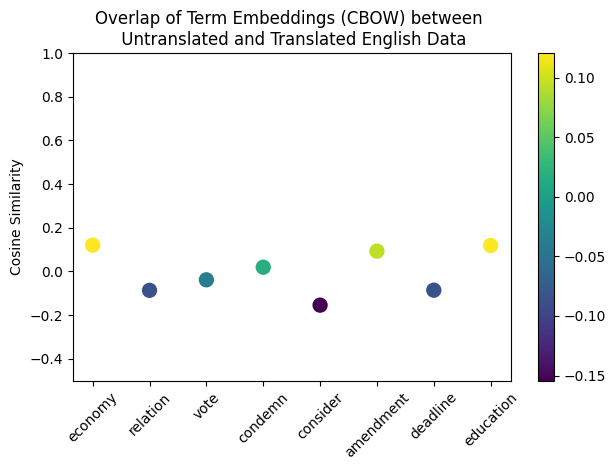

In [94]:
scores_array = np.array(filtered_scores)
scatter = plt.scatter(filtered_terms, filtered_scores, c=scores_array, cmap='viridis', s=100)

plt.ylim(-0.5, 1)
plt.ylabel("Cosine Similarity")
plt.title("Overlap of Term Embeddings (CBOW) between \n Untranslated and Translated English Data")
plt.xticks(rotation=45)
plt.colorbar(scatter)  
plt.tight_layout()

plt.savefig('english_cos.png')

plt.show()

In [100]:
#for economy: comparing translated - translated, untranslated - untranslated, translated - untranslated 

#untranslated - untranslated
u_df_1 = u_df.sample(217421 // 2) #randomly get half of the u_df corpus 
u_df_2 = u_df.sample(217421 // 2) #randomly get half of the u_df corpus  

sentences_1 = u_df_1['sentence'].dropna().tolist()
sentences_2 = u_df_2['sentence'].dropna().tolist()

tokenized_sentences_1 = [word_tokenize(sentence.lower()) for sentence in sentences_1]
tokenized_sentences_2 = [word_tokenize(sentence.lower()) for sentence in sentences_2]

model_1 = Word2Vec(sentences=tokenized_sentences_1, vector_size=100, window=5, min_count=1, sg=0)
model_2 = Word2Vec(sentences=tokenized_sentences_2, vector_size=100, window=5, min_count=1, sg=0)

if "economy" in model_1.wv and "economy" in model_2.wv:
    vec_1 = model_1.wv["economy"]
    vec_2 = model_2.wv["economy"]

    # Reshape vectors to be 2D (required by cosine_similarity)
    vec_1 = vec_1.reshape(1, -1)
    vec_2 = vec_2.reshape(1, -1)

    similarity = cosine_similarity(vec_1, vec_2)[0][0]
    print(f"Cosine similarity between 'economy' in both models: {similarity:.4f}")
else:
    print("out of vocabulary :(")

#translated - translated
t_df_1 = t_df.sample(217421 // 2) #randomly get half of the u_df corpus 
t_df_2 = t_df.sample(217421 // 2) #randomly get half of the u_df corpus  

sentences_1 = u_df_1['sentence'].dropna().tolist()
sentences_2 = u_df_2['sentence'].dropna().tolist()

tokenized_sentences_1 = [word_tokenize(sentence.lower()) for sentence in sentences_1]
tokenized_sentences_2 = [word_tokenize(sentence.lower()) for sentence in sentences_2]

model_1 = Word2Vec(sentences=tokenized_sentences_1, vector_size=100, window=5, min_count=1, sg=0)
model_2 = Word2Vec(sentences=tokenized_sentences_2, vector_size=100, window=5, min_count=1, sg=0)

if "economy" in model_1.wv and "economy" in model_2.wv:
    vec_1 = model_1.wv["economy"]
    vec_2 = model_2.wv["economy"]

    # Reshape vectors to be 2D (required by cosine_similarity)
    vec_1 = vec_1.reshape(1, -1)
    vec_2 = vec_2.reshape(1, -1)

    similarity = cosine_similarity(vec_1, vec_2)[0][0]
    print(f"Cosine similarity between 'economy' in both models: {similarity:.4f}")
else:
    print("out of vocabulary :(")

Cosine similarity between 'economy' in both models: 0.4935
Cosine similarity between 'economy' in both models: 0.5247


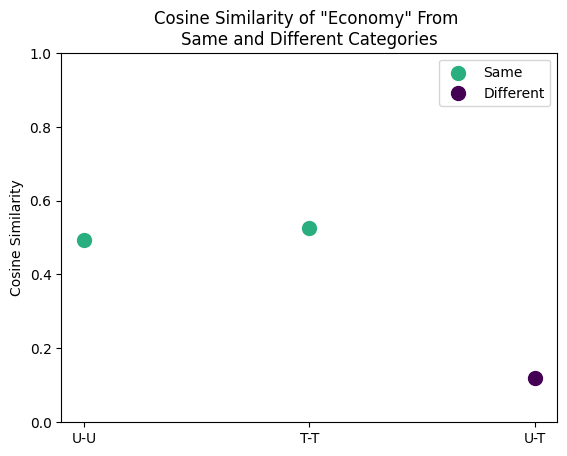

In [115]:
#plot similarities 

x = ["U-U", "T-T", "U-T"]
y = [0.4935, 0.5247, 0.120657004415988] 


plt.ylim(0, 1)
plt.ylabel("Cosine Similarity")
plt.title("Cosine Similarity of \"Economy\" From \nSame and Different Categories")

plt.scatter(x[:2], y[:2], color='#29af7f', label='Same', marker='o', s = 100)
plt.scatter(x[2:], y[2:], color='#440154', label='Different', marker='o', s = 100)

plt.legend()

plt.savefig('economy.png')